# EDA - Testování statistických hypotéz

V minulých lekcích EDA jsme se hodně soustředili na zpracování dat a jejich vizualizaci a když už jsme zavadili o nějakou tu statistiku, řešili jsme ji převážně intuicí. Takový přístup funguje vcelku dobře, dokud je naše analýza jen povrchovým zkoumáním a nepotřebujeme své výsledky někde oficiálně publikovat nebo o ně opřít nějaká závažná rozhodnutí.

Když už se ale rozhodneme podrobit naše domněnky důkladnějšímu zkoumání, nevyhneme se statistickým testům.

## Statistické testy

Statistických testů existuje obrovská spousta a každý je dobrý na něco jiného. Situace je ještě složitější v tom, že na ověření jedné skutečnosti je možné použít hned několik testů, které se mezi sebou liší jen málo, a vybrat ten správný je samo o sobě celkem komplikované.

Vzpomínáš ještě na normální rozdělení pravděpodobnosti z minulých lekcí? Že ho nějaká proměnná může mít tě napadne hned, když uvidíš histogram tvaru zvonu. Jenže to je pouhá intuice a podpořit či vyvrátit tento pocit lze mnoha různými statistickými testy. Testy se navíc neomezují jen na složitý vzorec s číselným výsledkem. Pojďme si vzít test normality jako ukázkový příklad.

### Jen trošku lepší intuice

Chceme-li naši intuici jen trošku vylepšit a podpořit, můžeme využít pro přibližný test normality pár jednoduchých pravidel:

* Průměr a medián by se neměli lišit o více jak 10 %
* Mělo by platit [pravidlo 68-95-99.7](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)
* … a další

Je to stále ale jen lepší intuice.

### Grafické testy

Nejsnáze představitelný grafický test normality spočívá v proložení histogramu křivkou obkreslující ideální normální rozložení (Gaussova křivka). Pokud zkoumaný histogram perfektně kopíruje ideální stav, není dále nad čím přemýšlet.

Krabicový graf také pomůže. Pokud má zkoumaná proměnná normální rozložení pravděpodobnosti, bude její vyjádření v krabicovém grafu symetrické, průměr a medián budou stejné a uprostřed grafu a bude zde minimum odlehlých měření.

Drobet složitější grafickou metodou mohou být [Q-Q](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) nebo [P-P](https://en.wikipedia.org/wiki/P%E2%80%93P_plot) grafy, kde rovná diagonální čára znamená perfektní shodu ideálního rozdělení s tím zkoumaným.

### Početní testy

No a nakonec je tady samozřejmě řada početních testů, které k ověření normality přistupují po svém. A není jich málo. Tak například:

* D'Agostino's K-squared test,
* Jarque–Bera test,
* Anderson–Darling test,
* Cramér–von Mises criterion,
* Kolmogorov–Smirnov,
* Lilliefors test,
* Shapiro–Wilk test a
* Pearson's chi-squared test.

Často se ale používá jen omezená množina testů a další se hledají, až když se jedná o nějaký velmi specifický případ.

Vypočíst statistický test není s pomocí mocných knihoven problém. Je ale třeba na začátku stanovit několik věcí, nastavit to správné očekávání, vybrat ten správný test a umět interpretovat jeho výsledky. Jednou ze základních věcí jsou nulová a alternativní hypotéza.

## Nulová a alternativní hypotéza

Statistická hypotéza je určitá domněnka (předpoklad) o jakékoli vlastnosti základního souboru. Pokud řekneme „základní soubor má normální rozdělení“, je to jen naše domněnka, protože neznáme všechny prvky základního souboru. Proto každé tvrzení (hypotézu) o ZS musíme testovat. Teprve na základě testu, který vychází z naměřených (výběrových) dat můžeme rozhodnout, zda tuto domněnku (hypotézu) můžeme považovat za platnou nebo za neplatnou. Pro každý test musíme formulovat nulovou a alternativní hypotézu. Testovaná hypotéza se nazývá nulová hypotéza (H0). Předpokládáme, že platí, pokud nemáme k dispozici dostatečný statistický důkaz její neplatnosti. Pokud zamítneme platnost nulové hypotézy, předpokládáme, že platí alternativní hypotéza (HA). H0 a HA musí být formulovány tak, aby nebyla možná žádná „třetí možnost“. Buď platí H0 nebo HA, nic dalšího není možné.

> Není třeba si s tím lámat hlavu. Na internetu je spousta návodů na tvorbu nulových hypotéz a každý statistický test má nějakou svou standardní nulovou hypotézu.

Pro náš test normality tedy nulová hypotéza bude:

H0: *Zkoumané rozdělení pravděpodobnosti má normálního rozdělení*

K nulové hypotéze existuje hypotéza alternativní, která nejčastěji říká v podstatě opak. V našem případě tedy bude:

HA: *Zkoumané rozdělení pravděpodobnosti je odlišné od normálního rozdělení*

## p-value

Samotný výsledek statistického testu není dostačující. Vezměme například korelaci. Pokud budeme mít jen 10 záznamů, bude pravděpodobnost, že se vysoká korelace objeví jen náhodou, daleko větší, než když budeme mít záznamů 1000. Menší datová sada je i v tomto případě více náchylná na výskyt náhodných jevů a vztahů. A s tímto nám pomůže právě p-value, která nám výsledek statistického testu doplní o informaci, zda a jak moc je možné mu věřit.

Čím menší je p-value, tím menší je pravděpodobnost, že se zkoumaný jev (H0) v dané míře objeví jen náhodou. p-value u předchozího příkladu bude tedy daleko větší u datové sady s deseti záznamy, protože tam se vysoká korelace může daleko snáze objevit jen náhodou, zatímco u tisíce záznamů je pravděpodobnost takové náhody daleko menší.

p-value nám hlavně pomůže rozhodnout, zda zamítneme nulovou hypotézu, či nikoli. K tomu si ale musíme pro p-value stanovit nějakou hranici a to ještě před provedením testu samotného. Této hranici se říká hladina významnosti a označuje se řeckým písmenem α. Nejběžněji používanou hladinou významnosti pro p-value je 0,05. Pokud bude výsledná p-value menší, efekt se v datech nevyskytuje náhodou a my můžeme zamítnout nulovou hypotézu a podpořit hypotézu alternativní. Pokud bude p-value naopak větší, je pravděpodobnější, že data daný jev opravdu reprezentují a nulová hypotéza zůstane platná.

Pozor na to, že zde není žádná šedá zóna. Jakmile si hladinu významnosti stanovíme, je výsledek buď černý nebo bíly, buď ano nebo ne. Nic mezi tím. Ani kdyby p-value vyšla jen o 0,01 vyšší než je naše α.

Hladina významnosti pro p-value se samozřejmě dá nastavit i jinak. Pokud je pravděpodobnost výskytu zkoumaného jevu velmi malá, hladina významnosti se často snižuje. Například v CERNu při hledání velmi vzácného Higgsova bosonu měli hladinu významnosti nastavenu na 3×10⁻⁷. Naopak, pokud je pravděpodobnost, že se zkoumaný jen objeví náhodou, vysoká, může se hladina významnosti vyšplhat až na 0,1.

Pro naši potřebu testu normality s náhodnými daty si necháme α = 0,05.

Teď už víme vše potřebné a můžeme se pustit do testování.

## Test normality

V prvním pokusu si vygenerujeme náhodná data přibližně odpovídající normálnímu rozložení a zkusíme je otestovat Shapiro–Wilk testem.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import shapiro, kstest

%matplotlib inline

S pomocí numpy vygenerujeme seznam tisíce čísel s normálním rozdělením pravděpodobnosti, průměrem 10 a směrodatnou odchylkou 2.

In [2]:
tisic_cisel = np.random.normal(10, 2, 1000)

Pro zobrazení jednoduchého histogramu můžeme použít matplotlib přímo a obejít se bez pandasu.

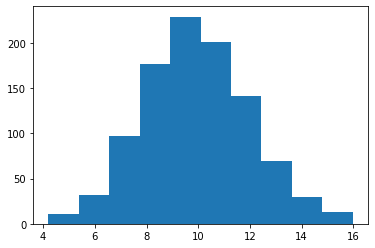

In [3]:
plt.hist(tisic_cisel);

In [4]:
shapiro(tisic_cisel)

(0.9978026151657104, 0.20951364934444427)

První číslo je výsledek samotného testu. Hodnota velmi blízko jedné naznačuje, že distribuce našich náhodně generovaných čísel je velmi podobná normálnímu rozdělení.

Druhé číslo je p-value. p-value je daleko vyšší než naše α = 0,05 a tak nemůžeme zamítnout nulovou hypotézu, že se rozdělení našich dat neliší od normálního rozdělení. H0 je tedy přijata a můžeme prohlásit, že náše data pocházejí z normálního rozdělení.

## Pearsonův korelační koeficient

V druhém statistickém testu se vrátíme k datům o výdělku a zdravém stravování zaměstnanců a pokusíme se znovu ověřit korelaci mezi výší výdělku a délkou praxe.

Nulová hypotéza v tomto případě bude: *Neexistuje statisticky významný vztah mezi mzdou a délkou praxe v oboru.*
Alternativní hypotéza bude přesný opak: *Existuje statisticky významný vztah mezi mzdou a délkou praxe v oboru.*

Protože nemáme žádné další vodítka pro určení správné hladiny významnosti k zamítnutí nulové hypotézy, ponecháme si ji na hodnotě 0,05.

In [5]:
import pandas as pd
from scipy.stats import pearsonr

In [6]:
data = pd.read_csv("../multivariate/static/salary.csv")

In [7]:
data.describe()

,id,age,healthy_eating,active_lifestyle,salary,months_of_exp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,499.500000,41.155000,4.944000,5.683000,2227.46100,175.388000
std,288.819436,13.462995,2.013186,2.048587,1080.20976,96.778311
min,0.000000,18.000000,0.000000,0.000000,553.00000,3.000000
25%,249.750000,30.000000,4.000000,4.000000,1360.00000,101.000000
50%,499.500000,41.000000,5.000000,6.000000,2174.00000,173.000000
75%,749.250000,53.000000,6.000000,7.000000,2993.75000,248.000000
max,999.000000,64.000000,10.000000,10.000000,5550.00000,360.000000


In [8]:
data.corr()

,id,age,healthy_eating,active_lifestyle,salary,months_of_exp
id,1.000000,-0.033595,-0.004993,0.028897,-0.012048,0.000071
age,-0.033595,1.000000,-0.014969,0.148267,-0.072231,-0.058026
healthy_eating,-0.004993,-0.014969,1.000000,0.031613,0.858405,0.700612
active_lifestyle,0.028897,0.148267,0.031613,1.000000,-0.323575,-0.225714
salary,-0.012048,-0.072231,0.858405,-0.323575,1.000000,0.799953
months_of_exp,0.000071,-0.058026,0.700612,-0.225714,0.799953,1.000000


In [9]:
pearsonr(data.salary, data.months_of_exp)

(0.7999528408949278, 1.37822950311405e-223)

Výsledek testu obsahuje jako první číslo samotný korelační koeficient, který je shodný s tím, co nám nabídnul pandas v přehledové tabulce. Druhé číslo je p-value, která je v tomto případě o hodně menší než námi stanovená α = 0,05 a tak můžeme zamítnout nulovou hypotézu a podpořit hypotézu alternativní. Mezi mzdou a délkou praxe v oboru tedy existuje statisticky významná korelace.

## Rady na závěr

Důležité je nenechat se odradit zdánlivou složitostí a brát statistické testy jako dobrou pomůcku pro ověřování hypotéz, které při analýze vyvstanou. Skoro každý statistický test má také svou stránku na Wikipedii, kde je vše podrobně vysvětleno a není tak ani třeba si lámat hlavu s vymýšlením nulové a alternativní hypotézy. Při použití je také dobré si ověřit, zda test klade nějaké podmínky na testovaná data (velikost populace, rozdělení pravděpodobnosti atp.).

## Čas na hraní

Pokud stále ještě analyzuješ vlastní data, může být dobré se v analýze vrátit k některým zajímavým výsledkům a zkusit je podpořit vhodným statistickým testem.